In [2]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
# Data source 
# https://www.kaggle.com/gilsousa/habermans-survival-data-set

# Age : Age of patient at time of Operation
# Op_Year : Year of Operation
# Axil_nodes : Number of positive axillary nodes detected
# Surv_Status : 1 = the patient survived 5 years or longer (green)
#               2 = the patient died within 5 year (red)

# Load data
habermansData = pd.read_csv("/home/prince/Projects/Coding/ML/AppliedAICourse/Assignment1_Habermans/haberman.csv",
                            names=["Age", "Op_Year", "Axil_nodes", "Surv_Status"])
warnings.filterwarnings("ignore")

### Get the Basic description about the data

In [4]:
print(habermansData.columns, '\n')
print(habermansData.shape, '\n')
print(habermansData["Surv_Status"].value_counts(), '\n')
print(habermansData.describe())

Index(['Age', 'Op_Year', 'Axil_nodes', 'Surv_Status'], dtype='object') 

(306, 4) 

1    225
2     81
Name: Surv_Status, dtype: int64 

              Age     Op_Year  Axil_nodes  Surv_Status
count  306.000000  306.000000  306.000000   306.000000
mean    52.457516   62.852941    4.026144     1.264706
std     10.803452    3.249405    7.189654     0.441899
min     30.000000   58.000000    0.000000     1.000000
25%     44.000000   60.000000    0.000000     1.000000
50%     52.000000   63.000000    1.000000     1.000000
75%     60.750000   65.750000    4.000000     2.000000
max     83.000000   69.000000   52.000000     2.000000


### First we will check the patients data on each of their features

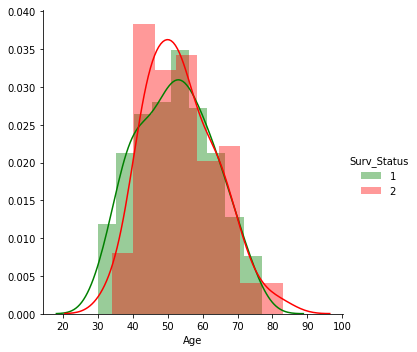

In [5]:
# Age
sns.FacetGrid(habermansData, hue="Surv_Status", height=5, palette=["g", "r"]) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

From this graph we can just infer that the likelyhood of patients surviving in the early age (below 35) is more
compared with later ages, as we see the green line above the red one. Also, the likelyhood of deaths drastically increased in the age group (42 - 62). After that the matter of life and death have almost equal probability. In the later years around(72-73) we see a slight increase in the pdf but no strong conclusion can be drived from that.

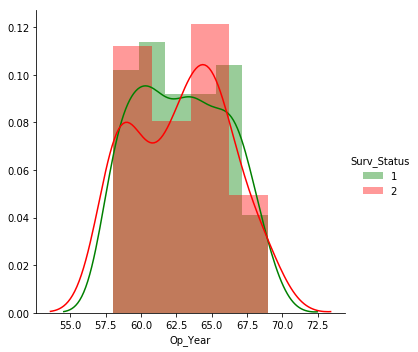

In [6]:
# Op_Year
sns.FacetGrid(habermansData, hue="Surv_Status", height=5, palette=["g", "r"]) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.show();

From this graph we can conclude that while the likelihood of patients dying of cancer is generally more, throughout the decade, there are just two short periods where more number of people successfully won their battle against cancer. Between the year 1961-mid of 1962, the likelihood of patients surviving the operation increased.

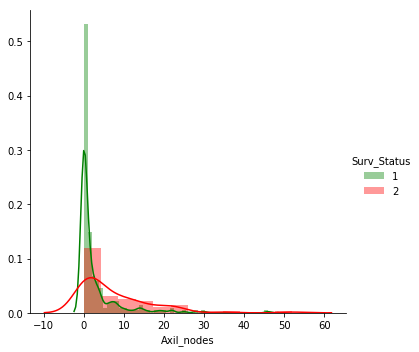

In [7]:
# Axil_nodes

sns.FacetGrid(habermansData, hue="Surv_Status", height=5, palette=["g", "r"]) \
   .map(sns.distplot, "Axil_nodes") \
   .add_legend();
plt.show();

It is very clear from the distribution plot above that when the number of axiliairy nodes detected are less than around 2, then there is high likelihood of the patient surviving after the operations. More the nodes, less are the chances of survival.  

### Now we will check the 2-D Pair Plots for all the features against each other

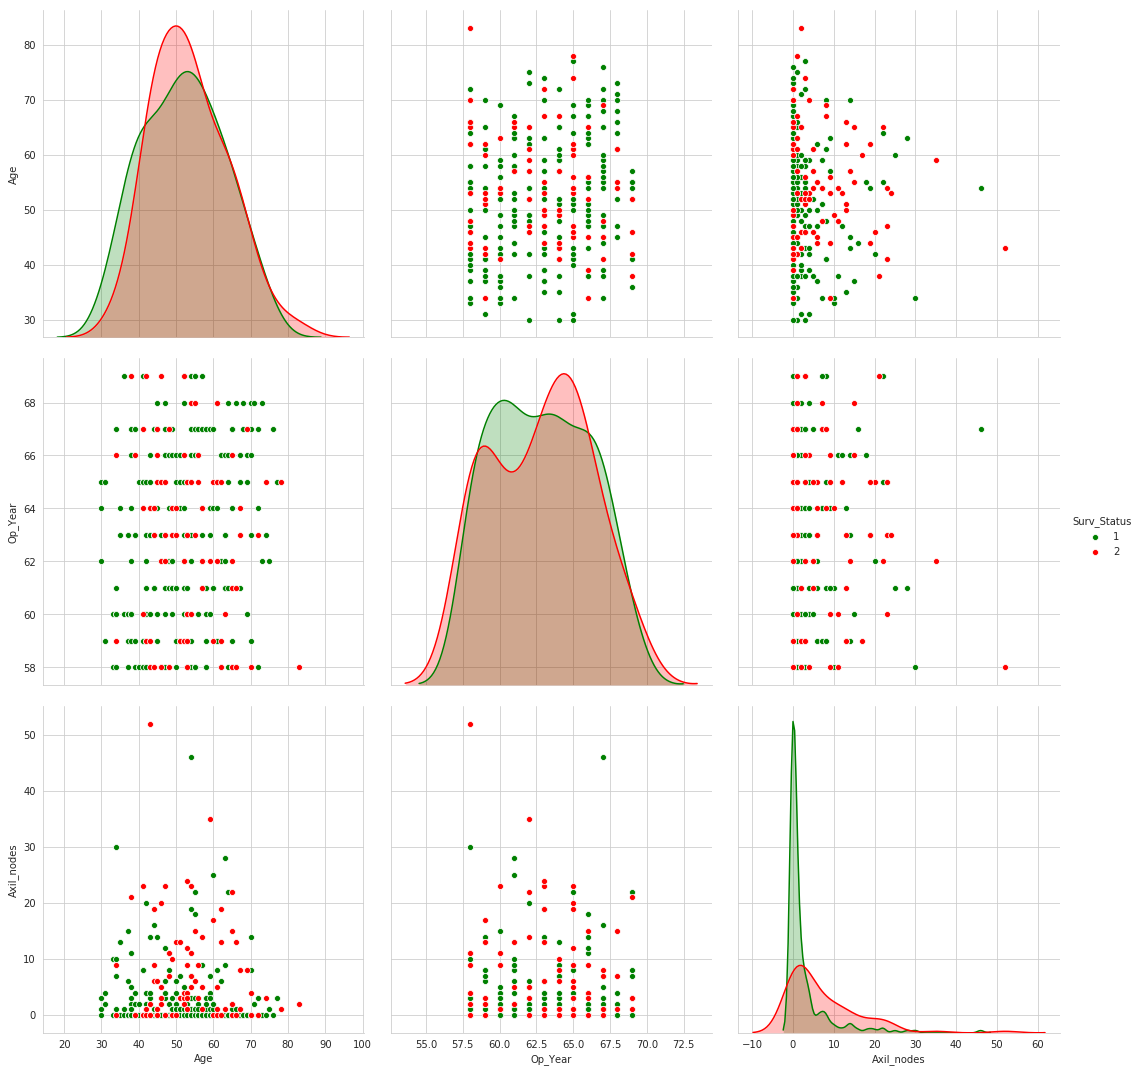

In [8]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(habermansData, hue="Surv_Status", height=5, palette=["g", "r"], \
                     vars=["Age", "Op_Year", "Axil_nodes"]);
plt.show()

We have already studied the pdf plots for each feature in the previous section. In this we will study the dependence of each feature on the other two. For this we will focus on the upper diagonal of the pair plot matrix.

Lets name the plots based on x-y axis labels.

 - For Op_Year-Age plot: No proper demarcation can be derived so as to linearly classify the two labels. Nothing even closeby seems to be possible. We can only make a weak conclusion that for all the Operations Years most of the patients below 40 years of age were able to survive after the operation    
 
 - For Axil_nodes-Age plot : No proper demarcation possible as of now. We will continue to study this relationship after some scaling and normalization to have a clearer picture.
 
 - For Axil_nodes-Op_Year plot : No proper demarcation possible as of now. We will continue to study this relationship after some scaling and normalization to have a clearer picture.

In [9]:
# Just testing few stuffs

# df = pd.DataFrame([[60, 6], [20, 2], [100, 10], [120, 12]])
# print(df)
# print(df.describe())
# normalized_df=((df-df.min())/(df.max()-df.min()))
# print(normalized_df)
# normalized_df=((df-df.mean())/df.std())
# print(normalized_df)

### Now we will again check the 2-D Scatter Plots for Axil_Nodes against the other features, but this time using normalised data set

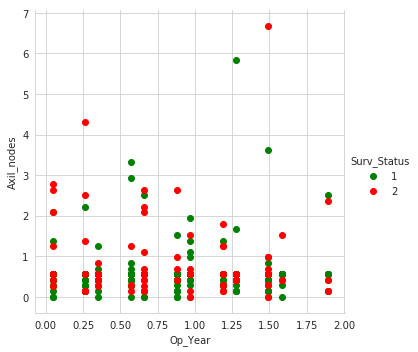

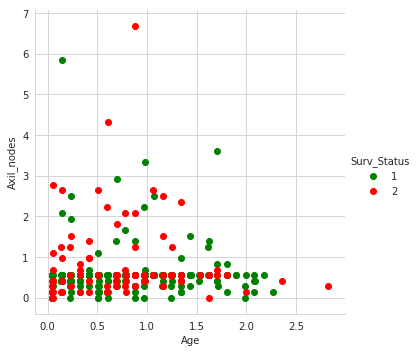

In [10]:
# This is mean normalisation
habermansData_Norm = abs(habermansData-habermansData.mean())/habermansData.std()
habermansData_Norm["Surv_Status"] = habermansData["Surv_Status"]

sns.set_style("whitegrid");
sns.FacetGrid(habermansData_Norm, hue="Surv_Status", height=5, palette=["g", "r"]) \
   .map(plt.scatter, "Op_Year", "Axil_nodes") \
   .add_legend();
plt.show();       

sns.set_style("whitegrid");
sns.FacetGrid(habermansData_Norm, hue="Surv_Status", height=5, palette=["g", "r"]) \
   .map(plt.scatter, "Age", "Axil_nodes") \
   .add_legend();
plt.show();      

Even with the scatter plots using normalised data set nothing conclusive is visible for the relationship of Axil nodes Vs Age and Year of Operation. We will further continue our study of Axil_Nodes feature

### Further analysis of Axil_Nodes feature using Cumulative Distribution Function on survivors and deceased separately

In [11]:
# Lets have a different copy of data for the survivors and the deceased. 

habermansData_Surv = habermansData.loc[habermansData["Surv_Status"] == 1]
habermansData_Dec = habermansData.loc[habermansData["Surv_Status"] == 2]

Text(0.5,1,"PDF and CDF of 'Axil_nodes' feature for All patients")

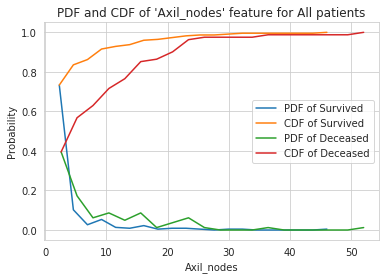

In [12]:
# Plot for survivors

count, bin_Edges = np.histogram(habermansData_Surv["Axil_nodes"], density=True, bins=20)
ax_Pdf = count / sum(count)
# print(habermansData_Surv.count(), '\n')
# print(ax_Pdf, '\n')
# print(bin_Edges, '\n')
ax_Cdf = np.cumsum(ax_Pdf)
# print(ax_Cdf, '\n')

plt.plot(bin_Edges[1:], ax_Pdf, label="PDF of Survived")
plt.plot(bin_Edges[1:], ax_Cdf, label="CDF of Survived")
# plt.legend()
# plt.xlabel("Axil_nodes")
# plt.ylabel("Probability")
# plt.title("PDF and CDF of 'Axil_nodes' feature for Class = 'survived >= 5yrs' ")


# Plot for Deceased

count, bin_Edges = np.histogram(habermansData_Dec["Axil_nodes"], density=True, bins=20)
ax_Pdf = count / sum(count)
# print(habermansData_Dec.count(), '\n')
# print(ax_Pdf, '\n')
# print(bin_Edges, '\n')
ax_Cdf = np.cumsum(ax_Pdf)
# print(ax_Cdf, '\n')

plt.plot(bin_Edges[1:], ax_Pdf, label="PDF of Deceased")
plt.plot(bin_Edges[1:], ax_Cdf, label="CDF of Deceased")
plt.legend()
plt.xlabel("Axil_nodes")
plt.ylabel("Probability")
plt.title("PDF and CDF of 'Axil_nodes' feature for All patients")

From the above analysis it is clear that out of the 306 people, 225 survived and among them, 90-91% had axilliary nodes detected less than 10, as per the CDF plot of survivors. But again, the CDF plot of deceased shows that more than 70% of the deceased are people having Axil nodes less than or equal to 10. So, clearly this is an overlaping situation, without any clear threshold. However, we can define a threshold to be 4, that any patient having less than 4 detected axil nodes is more likely to be a survivor on the basis of the argument that PDF of survivor is more than that of the deceased in that region.

### Using box plot and whiskers

In [13]:
# Checking Quantiles

print(np.percentile(habermansData_Surv["Axil_nodes"],np.arange(0, 125, 25)))
print(np.percentile(habermansData_Dec["Axil_nodes"],np.arange(0, 125, 25)))

[ 0.  0.  0.  3. 46.]
[ 0.  1.  4. 11. 52.]


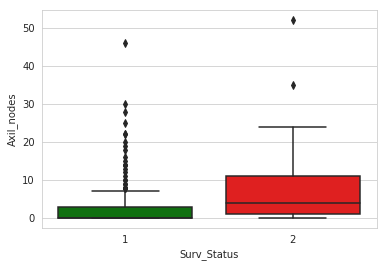

In [14]:
sns.boxplot(x='Surv_Status', y='Axil_nodes', data=habermansData, palette=['g', 'r'])
plt.show()

From the above graph, it is clear that for the survived patients the 75 percentile mark was much less than half of 10 (we know from the above code  snippet that it is 3). Overall, we can see that most of the values for "Axil_Nodes" lie in the range of 5 to 11.

### Violin Plots for Axil_Nodes

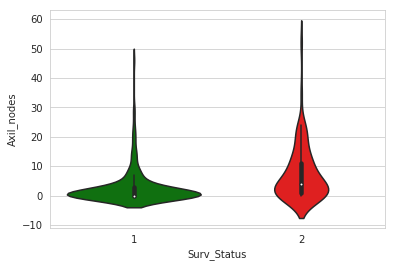

In [15]:
sns.violinplot(x='Surv_Status', y='Axil_nodes', data=habermansData, palette=['g', 'r'])
plt.show()

### Conclusion

Out of all the analysis above, we can conclude the following things:

    - Out of the three features Age, Operation Year and Axillary nodes detected, the last one is most helpful in classification
    
    - Although there are some overlapping regions for this feature to segregate the two classes but, the most favoured argument is that for a value of detected axillary nodes less than 3, the chances of patient surviving is more, hence we can keep that as the basis of classification.

In [19]:
print(habermansData_Surv.loc[habermansData_Surv["Axil_nodes"]==0])

     Age  Op_Year  Axil_nodes  Surv_Status
2     30       65           0            1
6     33       60           0            1
13    34       60           0            1
15    35       63           0            1
17    36       69           0            1
18    37       60           0            1
19    37       63           0            1
20    37       58           0            1
23    37       63           0            1
26    38       60           0            1
27    38       60           0            1
30    38       66           0            1
35    39       63           0            1
36    39       67           0            1
37    39       58           0            1
41    40       58           0            1
42    40       65           0            1
46    41       58           0            1
48    41       59           0            1
49    41       64           0            1
51    41       65           0            1
52    41       65           0            1
55    42   